# Import the Packages

In [1]:
import pandas
import numpy as np
import matplotlib.pyplot as plt
import logging
import os
## Customized DataParser to package the functions needed for data processing
from DataParser import DataParser
parser = DataParser()

# Generate Adjacancy Matrix
Include the dates of data would like to clean inside the list, path of the original data file (here is "../Users/"), and the path to save the result csv

In [2]:
# dates = ["04-11", "04-13", "04-17", "04-22", "04-26","05-08", "05-12", "05-16", "05-21", "05-25", "05-29","06-02", "06-06", "06-10", "06-14", "06-18", "06-22"]
dates = ["04-30", "05-04", "06-02", "06-22"]
path_of_data = "../Users/"
whether_save = False
save_path = "../Adjacancy_Matrix/"

## Get a dictionary of data in the format of {date1:dataframe1, date2:dataframe2, ...}
dict_data = parser.read_data(path_of_data, dates)

## For each date, generate the adjacancy matrix/adjusted adjacancy matrix
matrix_dict = {}
for date in dates:
    print("Processing date: ", date)
    df = dict_data[date]
    ## Get the adjacancy matrix without adjustment (uncomment below to generate matrix before adjustment)
    index_to_user, users_to_index, matrix = parser.generate_adjacancy_matrix(df, date)
    ## Get the adjusted adjacancy matrix
    # index_to_user, users_to_index, matrix = parser.generate_adjacancy_matrix_with_adjustment(df, date)
    if whether_save:
        os.mkdir(save_path) if not os.path.exists(save_path) else None
        ## Save the matrix to csv
        matrix_df = pandas.DataFrame(matrix, index=index_to_user.values(), columns=index_to_user.values())
        matrix_df.to_csv(save_path + date + "_adjacancy_matrix.csv")
    matrix_dict[date] = matrix

2023-10-24 13:41:55,309 - root - INFO - Data Load Complete for dates: ['04-30', '05-04', '06-02', '06-22']


Processing date:  04-30


2023-10-24 13:41:56,419 - root - INFO - Adjacency Matrix Generated for date: 04-30


Processing date:  05-04


2023-10-24 13:41:57,997 - root - INFO - Adjacency Matrix Generated for date: 05-04


Processing date:  06-02


2023-10-24 13:41:58,831 - root - INFO - Adjacency Matrix Generated for date: 06-02


Processing date:  06-22


2023-10-24 13:41:59,751 - root - INFO - Adjacency Matrix Generated for date: 06-22


# Result Validation
<p> Results can be found in matrix_dict also: </p>
<p> Take data for 04-13 as an example, can use validate function to visualize: </p>

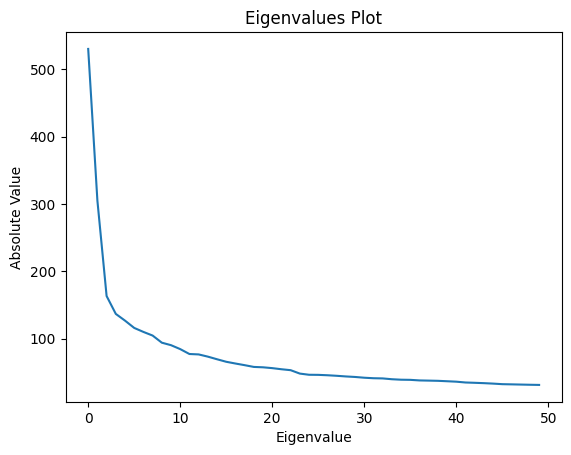

In [8]:
example = matrix_dict["04-30"]
# # set the diagonal to 0
# np.fill_diagonal(example, 0)
# parser.adjacancy_matrix_validation(example)

eigenvalues, eigenvectors = np.linalg.eigh(example)
# print(eigenvalues.sum())
eigenvalues_abs = list(map(abs, eigenvalues))
eigenvalues_abs = sorted(eigenvalues_abs, reverse=True) [:50]
# ## Plot the eigenvalues
plt.plot(eigenvalues_abs)
plt.xlabel('Eigenvalue')
plt.ylabel('Absolute Value')
plt.title('Eigenvalues Plot')
plt.show()

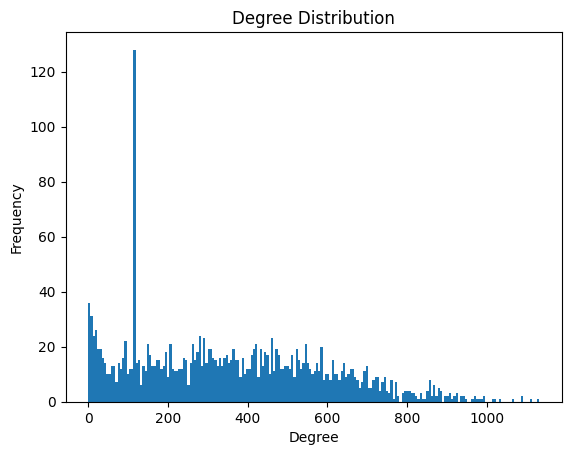

In [9]:
degree = example.sum(axis=0)
plt.hist(degree, bins=200)
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.title('Degree Distribution')
plt.show()

In [10]:
degree.mean()

356.9557608167234